In [2]:
import csv
import math
import random
import nltk
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import itertools
import collections
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re
import networkx as nx
import warnings
from nltk import bigrams
from textblob import TextBlob
from pandas import DataFrame
import string

### DISPLAYING THE DATA

In [3]:
import pandas as pd
df = pd.read_csv('covid_data1.csv')
df.head(20)

,tweets,likes,time,retweets
0,RT @annmarietimmins: DHHS has asked me to make...,0,2021-10-22 21:43:06+00:00,3
1,RT @GandBLawyers: Singapore with one of the hi...,0,2021-10-22 21:43:06+00:00,56
2,RT @Crof: Saskatoon hospital so full of COVID-...,0,2021-10-22 21:43:06+00:00,3
3,RT @mandophotos: A Day of the Dead ofrenda cre...,0,2021-10-22 21:43:04+00:00,952
4,RT @praveenausa: @hazydav @RepMattGaetz … ...,0,2021-10-22 21:43:03+00:00,1
5,The Alabama Hospital Association has released ...,0,2021-10-22 21:43:03+00:00,0
6,RT @SCMPNews: India recently administered its ...,0,2021-10-22 21:43:03+00:00,4
7,"Cases: 242,870,434 (+3,013) \nDeaths: 4,935,68...",0,2021-10-22 21:43:03+00:00,0
8,COVID-19: Most visitors to Guelph hospital wil...,0,2021-10-22 21:43:03+00:00,0
9,RT @ScottMorrisonMP: Congratulations to my fri...,0,2021-10-22 21:43:02+00:00,1980


### DATA PREPROCESSING
- Cleaning and processing the data
- Removing punctuations, stop words, and performing stemming and lemmitization for preparing the data

In [4]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
#Removing punctuations
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['tweets'].apply(lambda x: remove_punct(x))
df.head(10)

,tweets,likes,time,retweets,Tweet_punct
0,RT @annmarietimmins: DHHS has asked me to make...,0,2021-10-22 21:43:06+00:00,3,RT annmarietimmins DHHS has asked me to make t...
1,RT @GandBLawyers: Singapore with one of the hi...,0,2021-10-22 21:43:06+00:00,56,RT GandBLawyers Singapore with one of the high...
2,RT @Crof: Saskatoon hospital so full of COVID-...,0,2021-10-22 21:43:06+00:00,3,RT Crof Saskatoon hospital so full of COVID pa...
3,RT @mandophotos: A Day of the Dead ofrenda cre...,0,2021-10-22 21:43:04+00:00,952,RT mandophotos A Day of the Dead ofrenda creat...
4,RT @praveenausa: @hazydav @RepMattGaetz … ...,0,2021-10-22 21:43:03+00:00,1,RT praveenausa hazydav RepMattGaetz … No...
5,The Alabama Hospital Association has released ...,0,2021-10-22 21:43:03+00:00,0,The Alabama Hospital Association has released ...
6,RT @SCMPNews: India recently administered its ...,0,2021-10-22 21:43:03+00:00,4,RT SCMPNews India recently administered its on...
7,"Cases: 242,870,434 (+3,013) \nDeaths: 4,935,68...",0,2021-10-22 21:43:03+00:00,0,Cases \nDeaths \nRecovered \nActive Case...
8,COVID-19: Most visitors to Guelph hospital wil...,0,2021-10-22 21:43:03+00:00,0,COVID Most visitors to Guelph hospital will ne...
9,RT @ScottMorrisonMP: Congratulations to my fri...,0,2021-10-22 21:43:02+00:00,1980,RT ScottMorrisonMP Congratulations to my frien...


In [6]:
#Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head()

,tweets,likes,time,retweets,Tweet_punct,Tweet_tokenized
0,RT @annmarietimmins: DHHS has asked me to make...,0,2021-10-22 21:43:06+00:00,3,RT annmarietimmins DHHS has asked me to make t...,"[rt, annmarietimmins, dhhs, has, asked, me, to..."
1,RT @GandBLawyers: Singapore with one of the hi...,0,2021-10-22 21:43:06+00:00,56,RT GandBLawyers Singapore with one of the high...,"[rt, gandblawyers, singapore, with, one, of, t..."
2,RT @Crof: Saskatoon hospital so full of COVID-...,0,2021-10-22 21:43:06+00:00,3,RT Crof Saskatoon hospital so full of COVID pa...,"[rt, crof, saskatoon, hospital, so, full, of, ..."
3,RT @mandophotos: A Day of the Dead ofrenda cre...,0,2021-10-22 21:43:04+00:00,952,RT mandophotos A Day of the Dead ofrenda creat...,"[rt, mandophotos, a, day, of, the, dead, ofren..."
4,RT @praveenausa: @hazydav @RepMattGaetz … ...,0,2021-10-22 21:43:03+00:00,1,RT praveenausa hazydav RepMattGaetz … No...,"[rt, praveenausa, hazydav, repmattgaetz, not, ..."


In [7]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OnilChibaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,tweets,likes,time,retweets,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,RT @annmarietimmins: DHHS has asked me to make...,0,2021-10-22 21:43:06+00:00,3,RT annmarietimmins DHHS has asked me to make t...,"[rt, annmarietimmins, dhhs, has, asked, me, to...","[rt, annmarietimmins, dhhs, asked, make, clari..."
1,RT @GandBLawyers: Singapore with one of the hi...,0,2021-10-22 21:43:06+00:00,56,RT GandBLawyers Singapore with one of the high...,"[rt, gandblawyers, singapore, with, one, of, t...","[rt, gandblawyers, singapore, one, highest, va..."
2,RT @Crof: Saskatoon hospital so full of COVID-...,0,2021-10-22 21:43:06+00:00,3,RT Crof Saskatoon hospital so full of COVID pa...,"[rt, crof, saskatoon, hospital, so, full, of, ...","[rt, crof, saskatoon, hospital, full, covid, p..."
3,RT @mandophotos: A Day of the Dead ofrenda cre...,0,2021-10-22 21:43:04+00:00,952,RT mandophotos A Day of the Dead ofrenda creat...,"[rt, mandophotos, a, day, of, the, dead, ofren...","[rt, mandophotos, day, dead, ofrenda, created,..."
4,RT @praveenausa: @hazydav @RepMattGaetz … ...,0,2021-10-22 21:43:03+00:00,1,RT praveenausa hazydav RepMattGaetz … No...,"[rt, praveenausa, hazydav, repmattgaetz, not, ...","[rt, praveenausa, hazydav, repmattgaetz, someo..."
5,The Alabama Hospital Association has released ...,0,2021-10-22 21:43:03+00:00,0,The Alabama Hospital Association has released ...,"[the, alabama, hospital, association, has, rel...","[alabama, hospital, association, released, dai..."
6,RT @SCMPNews: India recently administered its ...,0,2021-10-22 21:43:03+00:00,4,RT SCMPNews India recently administered its on...,"[rt, scmpnews, india, recently, administered, ...","[rt, scmpnews, india, recently, administered, ..."
7,"Cases: 242,870,434 (+3,013) \nDeaths: 4,935,68...",0,2021-10-22 21:43:03+00:00,0,Cases \nDeaths \nRecovered \nActive Case...,"[cases, deaths, recovered, active, cases, comp...","[cases, deaths, recovered, active, cases, comp..."
8,COVID-19: Most visitors to Guelph hospital wil...,0,2021-10-22 21:43:03+00:00,0,COVID Most visitors to Guelph hospital will ne...,"[covid, most, visitors, to, guelph, hospital, ...","[covid, visitors, guelph, hospital, need, show..."
9,RT @ScottMorrisonMP: Congratulations to my fri...,0,2021-10-22 21:43:02+00:00,1980,RT ScottMorrisonMP Congratulations to my frien...,"[rt, scottmorrisonmp, congratulations, to, my,...","[rt, scottmorrisonmp, congratulations, friend,..."


In [9]:
#Stemming
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,tweets,likes,time,retweets,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,RT @annmarietimmins: DHHS has asked me to make...,0,2021-10-22 21:43:06+00:00,3,RT annmarietimmins DHHS has asked me to make t...,"[rt, annmarietimmins, dhhs, has, asked, me, to...","[rt, annmarietimmins, dhhs, asked, make, clari...","[rt, annmarietimmin, dhh, ask, make, clarif, p..."
1,RT @GandBLawyers: Singapore with one of the hi...,0,2021-10-22 21:43:06+00:00,56,RT GandBLawyers Singapore with one of the high...,"[rt, gandblawyers, singapore, with, one, of, t...","[rt, gandblawyers, singapore, one, highest, va...","[rt, gandblawy, singapor, one, highest, vaccin..."
2,RT @Crof: Saskatoon hospital so full of COVID-...,0,2021-10-22 21:43:06+00:00,3,RT Crof Saskatoon hospital so full of COVID pa...,"[rt, crof, saskatoon, hospital, so, full, of, ...","[rt, crof, saskatoon, hospital, full, covid, p...","[rt, crof, saskatoon, hospit, full, covid, pat..."
3,RT @mandophotos: A Day of the Dead ofrenda cre...,0,2021-10-22 21:43:04+00:00,952,RT mandophotos A Day of the Dead ofrenda creat...,"[rt, mandophotos, a, day, of, the, dead, ofren...","[rt, mandophotos, day, dead, ofrenda, created,...","[rt, mandophoto, day, dead, ofrenda, creat, is..."
4,RT @praveenausa: @hazydav @RepMattGaetz … ...,0,2021-10-22 21:43:03+00:00,1,RT praveenausa hazydav RepMattGaetz … No...,"[rt, praveenausa, hazydav, repmattgaetz, not, ...","[rt, praveenausa, hazydav, repmattgaetz, someo...","[rt, praveenausa, hazydav, repmattgaetz, someo..."


In [10]:
#Lemming
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

,tweets,likes,time,retweets,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,RT @annmarietimmins: DHHS has asked me to make...,0,2021-10-22 21:43:06+00:00,3,RT annmarietimmins DHHS has asked me to make t...,"[rt, annmarietimmins, dhhs, has, asked, me, to...","[rt, annmarietimmins, dhhs, asked, make, clari...","[rt, annmarietimmin, dhh, ask, make, clarif, p...","[rt, annmarietimmins, dhhs, asked, make, clari..."
1,RT @GandBLawyers: Singapore with one of the hi...,0,2021-10-22 21:43:06+00:00,56,RT GandBLawyers Singapore with one of the high...,"[rt, gandblawyers, singapore, with, one, of, t...","[rt, gandblawyers, singapore, one, highest, va...","[rt, gandblawy, singapor, one, highest, vaccin...","[rt, gandblawyers, singapore, one, highest, va..."
2,RT @Crof: Saskatoon hospital so full of COVID-...,0,2021-10-22 21:43:06+00:00,3,RT Crof Saskatoon hospital so full of COVID pa...,"[rt, crof, saskatoon, hospital, so, full, of, ...","[rt, crof, saskatoon, hospital, full, covid, p...","[rt, crof, saskatoon, hospit, full, covid, pat...","[rt, crof, saskatoon, hospital, full, covid, p..."
3,RT @mandophotos: A Day of the Dead ofrenda cre...,0,2021-10-22 21:43:04+00:00,952,RT mandophotos A Day of the Dead ofrenda creat...,"[rt, mandophotos, a, day, of, the, dead, ofren...","[rt, mandophotos, day, dead, ofrenda, created,...","[rt, mandophoto, day, dead, ofrenda, creat, is...","[rt, mandophotos, day, dead, ofrenda, created,..."
4,RT @praveenausa: @hazydav @RepMattGaetz … ...,0,2021-10-22 21:43:03+00:00,1,RT praveenausa hazydav RepMattGaetz … No...,"[rt, praveenausa, hazydav, repmattgaetz, not, ...","[rt, praveenausa, hazydav, repmattgaetz, someo...","[rt, praveenausa, hazydav, repmattgaetz, someo...","[rt, praveenausa, hazydav, repmattgaetz, someo..."


- Removing unnecessary columns 

In [11]:
df = df.drop(['Tweet_punct', 'Tweet_tokenized', 'Tweet_nonstop', 'Tweet_stemmed'], axis =1)
df.head()

,tweets,likes,time,retweets,Tweet_lemmatized
0,RT @annmarietimmins: DHHS has asked me to make...,0,2021-10-22 21:43:06+00:00,3,"[rt, annmarietimmins, dhhs, asked, make, clari..."
1,RT @GandBLawyers: Singapore with one of the hi...,0,2021-10-22 21:43:06+00:00,56,"[rt, gandblawyers, singapore, one, highest, va..."
2,RT @Crof: Saskatoon hospital so full of COVID-...,0,2021-10-22 21:43:06+00:00,3,"[rt, crof, saskatoon, hospital, full, covid, p..."
3,RT @mandophotos: A Day of the Dead ofrenda cre...,0,2021-10-22 21:43:04+00:00,952,"[rt, mandophotos, day, dead, ofrenda, created,..."
4,RT @praveenausa: @hazydav @RepMattGaetz … ...,0,2021-10-22 21:43:03+00:00,1,"[rt, praveenausa, hazydav, repmattgaetz, someo..."


In [12]:
df.rename(columns = {'Tweet_lemmatized' : 'clean_tweets'}, inplace =True)
df.head()

,tweets,likes,time,retweets,clean_tweets
0,RT @annmarietimmins: DHHS has asked me to make...,0,2021-10-22 21:43:06+00:00,3,"[rt, annmarietimmins, dhhs, asked, make, clari..."
1,RT @GandBLawyers: Singapore with one of the hi...,0,2021-10-22 21:43:06+00:00,56,"[rt, gandblawyers, singapore, one, highest, va..."
2,RT @Crof: Saskatoon hospital so full of COVID-...,0,2021-10-22 21:43:06+00:00,3,"[rt, crof, saskatoon, hospital, full, covid, p..."
3,RT @mandophotos: A Day of the Dead ofrenda cre...,0,2021-10-22 21:43:04+00:00,952,"[rt, mandophotos, day, dead, ofrenda, created,..."
4,RT @praveenausa: @hazydav @RepMattGaetz … ...,0,2021-10-22 21:43:03+00:00,1,"[rt, praveenausa, hazydav, repmattgaetz, someo..."


### APPLYING TEXBLOB FOR TWEET SENTIMENTS

In [13]:
#Textblob sentiment analysis

from textblob import TextBlob
print("Running sentiment process")
for row in df.itertuples():
    tweet = df.at[row[0], 'tweets']
#run sentiment using TextBlob
    analysis = TextBlob(tweet)
#set value to dataframe
    df.at[row[0], 'polarity'] = analysis.sentiment[0]
    df.at[row[0], 'subjectivity'] = analysis.sentiment[1]
#Create Positive / negative column depending on polarity
    if analysis.sentiment[0]>0:
        df.at[row[0], 'sentiment'] = "Positive"
    elif analysis.sentiment[0]<0:
        df.at[row[0], 'sentiment'] = "Negative"
    else:
        df.at[row[0], 'sentiment'] = "Neutral"
        
        df.to_csv('covid_data3.csv')
        
df.head()

Running sentiment process


,tweets,likes,time,retweets,clean_tweets,polarity,subjectivity,sentiment
0,RT @annmarietimmins: DHHS has asked me to make...,0,2021-10-22 21:43:06+00:00,3,"[rt, annmarietimmins, dhhs, asked, make, clari...",0.00,0.00,Neutral
1,RT @GandBLawyers: Singapore with one of the hi...,0,2021-10-22 21:43:06+00:00,56,"[rt, gandblawyers, singapore, one, highest, va...",0.00,0.00,Neutral
2,RT @Crof: Saskatoon hospital so full of COVID-...,0,2021-10-22 21:43:06+00:00,3,"[rt, crof, saskatoon, hospital, full, covid, p...",0.35,0.55,Positive
3,RT @mandophotos: A Day of the Dead ofrenda cre...,0,2021-10-22 21:43:04+00:00,952,"[rt, mandophotos, day, dead, ofrenda, created,...",-0.20,0.40,Negative
4,RT @praveenausa: @hazydav @RepMattGaetz … ...,0,2021-10-22 21:43:03+00:00,1,"[rt, praveenausa, hazydav, repmattgaetz, someo...",0.00,1.00,Neutral


- Checking number of words per tweet

In [14]:
#number of words
df['word_count'] = df['clean_tweets'].apply(lambda x: len(str(x).split(" ")))
df[['clean_tweets','word_count']].head()

,clean_tweets,word_count
0,"[rt, annmarietimmins, dhhs, asked, make, clari...",12
1,"[rt, gandblawyers, singapore, one, highest, va...",15
2,"[rt, crof, saskatoon, hospital, full, covid, p...",12
3,"[rt, mandophotos, day, dead, ofrenda, created,...",16
4,"[rt, praveenausa, hazydav, repmattgaetz, someo...",12


- Finding the average length of the tweet

In [15]:
#to find the average word length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))
df['clean_tweets'] = df['clean_tweets'].astype(str)
df['avg_word'] = df['clean_tweets'].apply(lambda x: avg_word(x))
df[['clean_tweets','avg_word']].head()

,clean_tweets,avg_word
0,"['rt', 'annmarietimmins', 'dhhs', 'asked', 'ma...",10.083333
1,"['rt', 'gandblawyers', 'singapore', 'one', 'hi...",8.866667
2,"['rt', 'crof', 'saskatoon', 'hospital', 'full'...",9.500000
3,"['rt', 'mandophotos', 'day', 'dead', 'ofrenda'...",8.750000
4,"['rt', 'praveenausa', 'hazydav', 'repmattgaetz...",9.083333


- Removing and displaying common words used in tweets 

In [16]:
# Common word removal
freq = pd.Series(' '.join(df['clean_tweets']).split()).value_counts()[:10]
freq

'covid',      1546
['rt',        1379
'']           1253
'vaccine',     395
'case',        204
'death',       184
'new',         176
'people',      142
'booster',     141
'child',       128
Name: count, dtype: int64

### TFID FEATURE SELECTOR 

In [17]:
#TFID FEATURE SELECTOR
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit_transform(df['clean_tweets'].values.astype('U')) ## Even astype(str) would work

<2000x6121 sparse matrix of type '<class 'numpy.float64'>'
	with 26736 stored elements in Compressed Sparse Row format>

### COUNTVECTORIZER (BoW) FEATURE SELECTOR

In [18]:
#BoW FEATURE SELECTOR
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

### SPLITTING DATA INTO 80:20 TRAINING AND TEST SET

In [19]:
#SPLIT INTO 80:20 RATIO 
from sklearn.model_selection import train_test_split
X = df.clean_tweets
y = df.sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.20,random_state = 0)
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_train),(len(X_train[y_train == -1]) / (len(X_train)*1.))*100,(len(X_train[y_train == 1]) / (len(X_train)*1.))*100))

Train set has total 400 entries with 0.00% negative, 0.00% positive


### NAIVE BAYES MODEL WITH TFIDF

              precision    recall  f1-score   support

    negative       1.00      0.07      0.13       194
    positive       0.96      0.37      0.54       585
     neutral       0.60      1.00      0.75       821

    accuracy                           0.66      1600
   macro avg       0.86      0.48      0.47      1600
weighted avg       0.78      0.66      0.60      1600

accuracy score
0.655


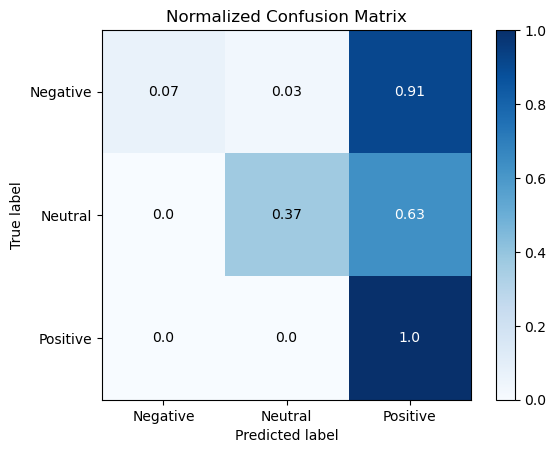

In [20]:
#USING TFID WITH NAIVE BAYES
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
tfidf = TfidfVectorizer(max_features=10000,ngram_range=(1, 3))
nb =MultinomialNB()
pipeline = Pipeline([
        ('vectorizer', tfidf),
        ('classifier', nb)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
df = print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))
print("accuracy score")
print(accuracy_score(y_test, y_pred))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

### SUPPORT VECTOR MACHINE WITH TFIDF

In [21]:
#USING TFID WITH SVM
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

              precision    recall  f1-score   support

    negative       1.00      0.17      0.29       194
    positive       0.97      0.38      0.54       585
     neutral       0.61      1.00      0.76       821

    accuracy                           0.67      1600
   macro avg       0.86      0.51      0.53      1600
weighted avg       0.79      0.67      0.62      1600

accuracy score
0.670625


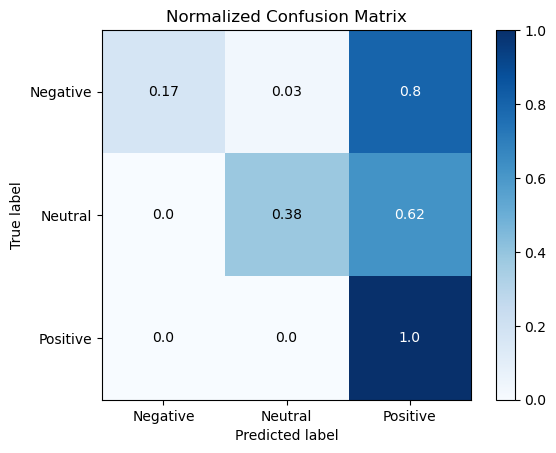

In [22]:
from sklearn.metrics import classification_report,accuracy_score
tfidf = TfidfVectorizer(max_features=10000,ngram_range=(1, 3))

svc = SVC()

pipeline = Pipeline([
        ('vectorizer', tfidf),
        ('classifier', svc)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))
#from sklearn.metrics import classification_report, 
 
#print(confusion_matrix(y_test,y_pred,target_names=['negative','positive','neutral']))  
#print(classification_report(y_test,predictions)) 
print("accuracy score")
print(accuracy_score(y_test, y_pred))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

### RANDOM FORREST WITH TFIDF

              precision    recall  f1-score   support

    negative       0.94      0.18      0.30       194
    positive       0.95      0.36      0.52       585
     neutral       0.60      0.99      0.75       821

    accuracy                           0.66      1600
   macro avg       0.83      0.51      0.52      1600
weighted avg       0.77      0.66      0.61      1600

Accuracy score:
0.660625


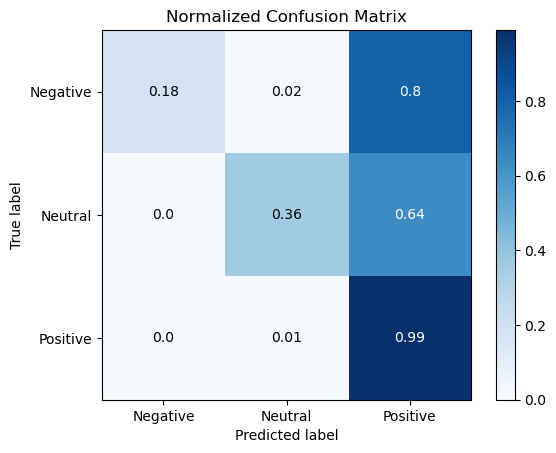

In [23]:
# TFIDF WITH RANDOM FOREST
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import scikitplot as skplt
import matplotlib.pyplot as plt

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 3))

# Random Forest Classifier
rf = RandomForestClassifier()

# Pipeline setup
pipeline = Pipeline([
    ('vectorizer', tfidf),
    ('classifier', rf)
])

# Fitting the model
sentiment_fit = pipeline.fit(X_train, y_train)

# Predictions
y_pred = sentiment_fit.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred, target_names=['negative', 'positive', 'neutral']))

# Accuracy score
print("Accuracy score:")
print(accuracy_score(y_test, y_pred))

# Confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

### ADABOOST WITH TFIDF

              precision    recall  f1-score   support

    negative       0.57      0.16      0.25       194
    positive       0.49      0.35      0.41       585
     neutral       0.57      0.79      0.66       821

    accuracy                           0.55      1600
   macro avg       0.55      0.43      0.44      1600
weighted avg       0.54      0.55      0.52      1600

Accuracy Score:
0.55


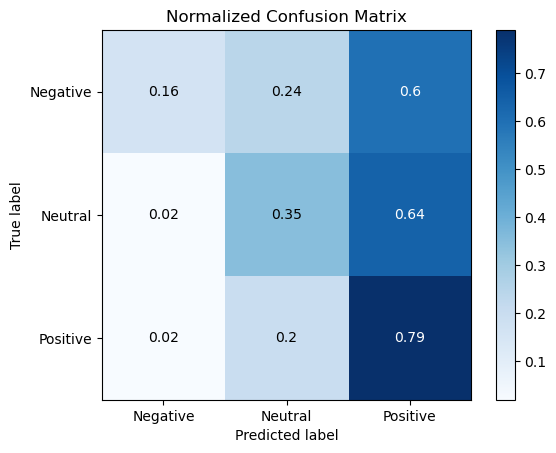

In [24]:
# TFIDF WITH ADABOOST
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import AdaBoostClassifier  # Import AdaBoost

tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 3))
# Initialize the AdaBoost classifier
ada = AdaBoostClassifier()

pipeline = Pipeline([
    ('vectorizer', tfidf),
    ('classifier', ada)
])

# Assuming X_train, y_train, X_test, y_test are already defined
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['negative', 'positive', 'neutral']))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Plotting Confusion Matrix
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()


### SUPPORT VECTOR MACHINE WITH BoW

              precision    recall  f1-score   support

    negative       1.00      0.16      0.28       194
    positive       0.64      0.81      0.72       585
     neutral       0.79      0.80      0.79       821

    accuracy                           0.73      1600
   macro avg       0.81      0.59      0.60      1600
weighted avg       0.76      0.73      0.70      1600

accuracy score
0.725625


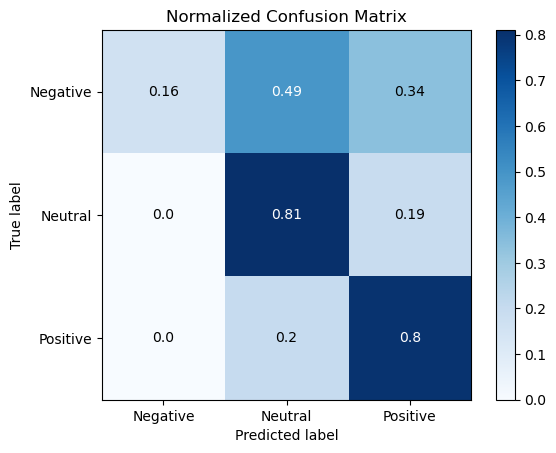

In [25]:
from sklearn.metrics import classification_report,accuracy_score
cv = CountVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', svc)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))
#from sklearn.metrics import classification_report, 
 
#print(confusion_matrix(y_test,y_pred,target_names=['negative','positive','neutral']))  
#print(classification_report(y_test,predictions)) 
print("accuracy score")
print(accuracy_score(y_test, y_pred))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

### NAIVE BAYES WITH BoW

              precision    recall  f1-score   support

    negative       0.71      0.20      0.31       194
    positive       0.72      0.59      0.65       585
     neutral       0.68      0.88      0.77       821

    accuracy                           0.69      1600
   macro avg       0.70      0.56      0.58      1600
weighted avg       0.70      0.69      0.67      1600

accuracy score
0.694375


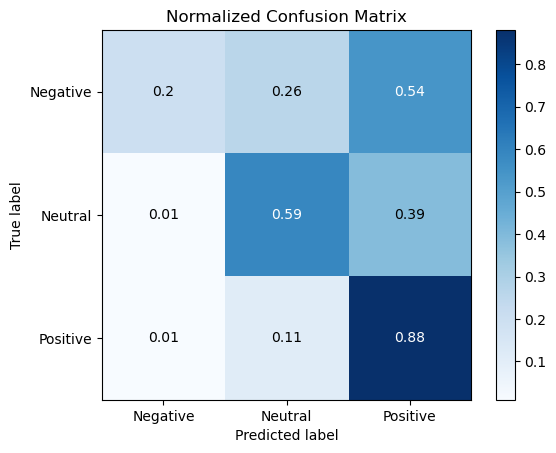

In [26]:
from sklearn.metrics import classification_report,accuracy_score
cv = CountVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', nb)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))
#from sklearn.metrics import classification_report, 
 
#print(confusion_matrix(y_test,y_pred,target_names=['negative','positive','neutral']))  
#print(classification_report(y_test,predictions)) 
print("accuracy score")
print(accuracy_score(y_test, y_pred))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

### RANDOM FOREST WITH BoW

              precision    recall  f1-score   support

    negative       0.94      0.18      0.30       194
    positive       0.96      0.37      0.53       585
     neutral       0.61      1.00      0.76       821

    accuracy                           0.67      1600
   macro avg       0.84      0.51      0.53      1600
weighted avg       0.78      0.67      0.62      1600

Accuracy Score: 0.666875


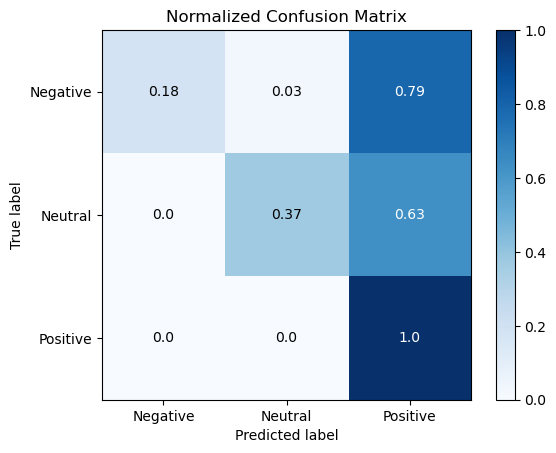

In [27]:
# BOW WITH RANDOM FOREST
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
import matplotlib.pyplot as plt

# Initialize CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1, 3))

# Create a pipeline with CountVectorizer and RandomForestClassifier
pipeline = Pipeline([
    ('vectorizer', cv),
    ('classifier', RandomForestClassifier())
])

# Fit the model
sentiment_fit = pipeline.fit(X_train, y_train)

# Make predictions
y_pred = sentiment_fit.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=['negative', 'positive', 'neutral']))

# Print accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot normalized confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

### ADABOOST WITH BoW

              precision    recall  f1-score   support

    negative       0.41      0.26      0.32       194
    positive       0.48      0.90      0.63       585
     neutral       0.88      0.39      0.54       821

    accuracy                           0.56      1600
   macro avg       0.59      0.52      0.50      1600
weighted avg       0.67      0.56      0.55      1600

Accuracy Score:
0.565


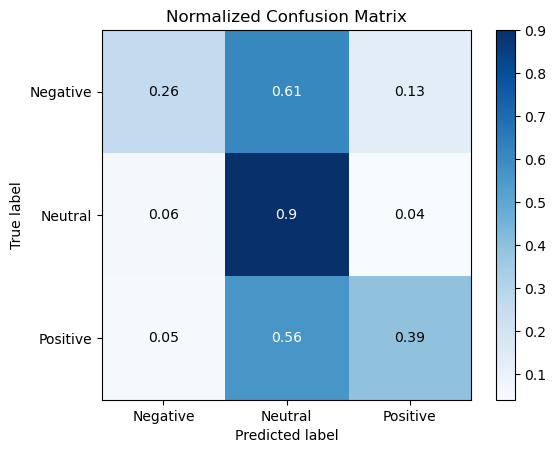

In [28]:

# BOW WITH ADABOOST
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
import scikitplot as skplt
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are already defined

cv = CountVectorizer(max_features=10000, ngram_range=(1, 3))
adaboost = AdaBoostClassifier()

pipeline = Pipeline([
    ('vectorizer', cv),
    ('classifier', adaboost)
])

sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['negative', 'positive', 'neutral']))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

### CNN IMPLIMENTATION

Epoch 1/10
12/12 [==============================] - 1s 39ms/step - loss: 1.0500 - accuracy: 0.4611 - val_loss: 0.9849 - val_accuracy: 0.4750
Epoch 2/10
12/12 [==============================] - 0s 26ms/step - loss: 0.9369 - accuracy: 0.5583 - val_loss: 0.9412 - val_accuracy: 0.4750
Epoch 3/10
12/12 [==============================] - 0s 25ms/step - loss: 0.8661 - accuracy: 0.5639 - val_loss: 0.8801 - val_accuracy: 0.5000
Epoch 4/10
12/12 [==============================] - 0s 26ms/step - loss: 0.7482 - accuracy: 0.7111 - val_loss: 0.8193 - val_accuracy: 0.5750
Epoch 5/10
12/12 [==============================] - 0s 26ms/step - loss: 0.5771 - accuracy: 0.8194 - val_loss: 0.7365 - val_accuracy: 0.6250
Epoch 6/10
12/12 [==============================] - 0s 27ms/step - loss: 0.3875 - accuracy: 0.8639 - val_loss: 0.6953 - val_accuracy: 0.5750
Epoch 7/10
12/12 [==============================] - 0s 28ms/step - loss: 0.2417 - accuracy: 0.9250 - val_loss: 0.6635 - val_accuracy: 0.6500
Epoch 8/10
12

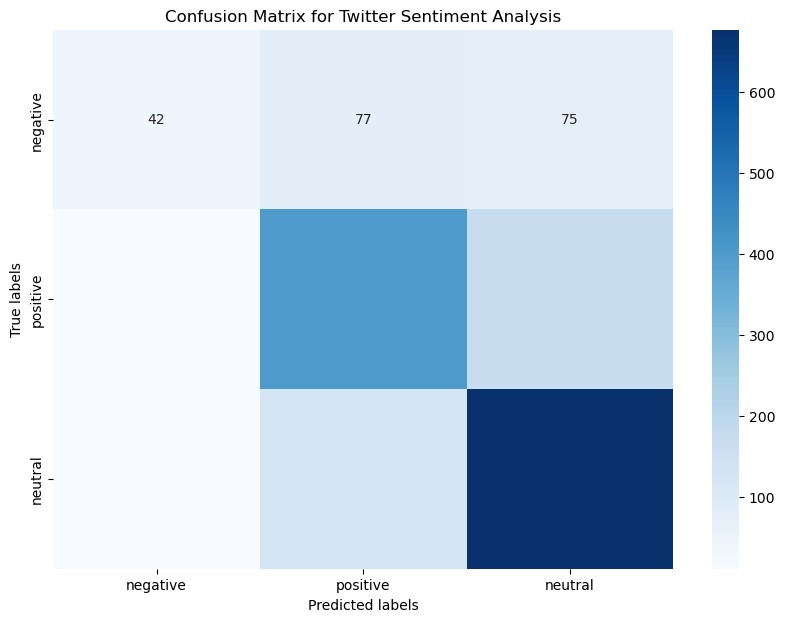

In [29]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters
vocab_size = 10000
max_length = 100
embedding_dim = 100
num_filters = 128
kernel_size = 5
hidden_dims = 128
batch_size = 32
epochs = 10

# Assuming X_train, y_train, X_test, y_test are your datasets
# Replace these with your actual datasets

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Convert string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode integer labels
y_train_encoded = to_categorical(y_train_encoded, num_classes=3)
y_test_encoded = to_categorical(y_test_encoded, num_classes=3)

# CNN Model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Conv1D(num_filters, kernel_size, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
model.fit(X_train_pad, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[es])

# Predict and evaluate
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

print(classification_report(y_test_classes, y_pred_classes, target_names=['negative', 'positive', 'neutral']))
print("Accuracy Score:", accuracy_score(y_test_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['negative', 'positive', 'neutral'], yticklabels=['negative', 'positive', 'neutral'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Twitter Sentiment Analysis')
plt.show()


### RNN IMPLIMENTATION

Epoch 1/10
13/13 [==============================] - 10s 525ms/step - loss: 1.1043 - accuracy: 0.4325 - val_loss: 1.0996 - val_accuracy: 0.1213
Epoch 2/10
13/13 [==============================] - 7s 523ms/step - loss: 1.1044 - accuracy: 0.1450 - val_loss: 1.1046 - val_accuracy: 0.1213
Epoch 3/10
13/13 [==============================] - 6s 510ms/step - loss: 1.1013 - accuracy: 0.3575 - val_loss: 1.0850 - val_accuracy: 0.3656
Epoch 4/10
13/13 [==============================] - 7s 542ms/step - loss: 1.0993 - accuracy: 0.2775 - val_loss: 1.1079 - val_accuracy: 0.1213
Epoch 5/10
50/50 [==============================] - 5s 85ms/step
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       194
    positive       0.00      0.00      0.00       585
     neutral       0.51      1.00      0.68       821

    accuracy                           0.51      1600
   macro avg       0.17      0.33      0.23      1600
weighted avg       0.26      0.51      0

c:\Users\OnilChibaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\OnilChibaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\OnilChibaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


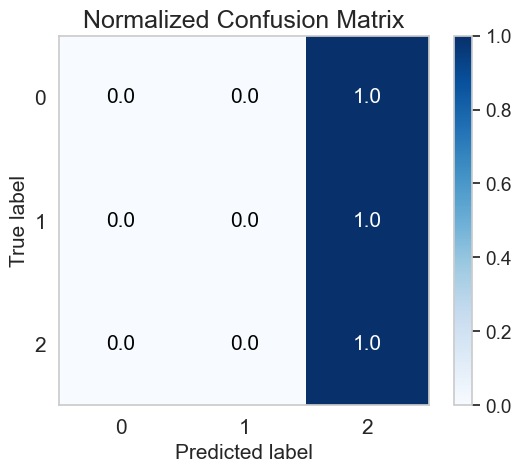

In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import scikitplot as skplt
import numpy as np
# from imblearn.over_sampling import RandomOverSampler  # Uncomment if using resampling

# Parameters
vocab_size = 10000
embedding_dim = 64
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

# Assuming X_train, y_train, X_test, y_test are your datasets
# Replace these with your actual datasets

# Tokenize the text
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# Convert text to sequences and pad them
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(sequences_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
padded_test = pad_sequences(sequences_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Optional: Resampling (Uncomment to use)
# ros = RandomOverSampler(random_state=42)
# padded_train, y_train_encoded = ros.fit_resample(padded_train, y_train_encoded)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weights_dict = dict(enumerate(class_weights))

# Build the RNN model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# Train the model
model.fit(padded_train, y_train_encoded, epochs=10, validation_data=(padded_test, y_test_encoded), class_weight=class_weights_dict, callbacks=[early_stop])

# Evaluate the model
y_pred = model.predict(padded_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# Classification report and accuracy
print(classification_report(y_test_encoded, y_pred_classes, target_names=['negative', 'positive', 'neutral']))
print("Accuracy Score:", accuracy_score(y_test_encoded, y_pred_classes))

# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test_encoded, y_pred_classes, normalize=True)
plt.show()


### DISPLAYING WORD DISTRIBUTION

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
def build_lda(X_train, num_topics=50):
    vec = CountVectorizer()
    transformed_X_train = vec.fit_transform(X_train)
    feature_names = vec.get_feature_names_out()  # Updated line
    lda = LatentDirichletAllocation(
        n_components=num_topics, max_iter=5, 
        learning_method='online', random_state=0)
    lda.fit(transformed_X_train)
    return lda, vec, feature_names

def display_word_distribution(model, feature_names, n_word):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        words = []
        for i in topic.argsort()[:-n_word - 1:-1]:
            words.append(feature_names[i])
        print(words)
lda_model, vec, feature_names = build_lda(X_train)
display_word_distribution(
    model=lda_model, feature_names=feature_names, 
    n_word=5)

Topic 0:
['say', 'limit', 'nothing', 'youre', 'mamab']
Topic 1:
['mpp', 'who', 'accused', 'premier', 'word']
Topic 2:
['anime', 'punishment', 'needed', 'localization', 'release']
Topic 3:
['covid', 'potential', 'regarding', 'israeli', 'rt']
Topic 4:
['body', 'doctorontario', 'strong', 'pas', 'rep']
Topic 5:
['meme', 'slashdot', 'life', 'httpstcokesxfwank', 'helped']
Topic 6:
['covid', 'rt', 'really', 'may', 'pandemic']
Topic 7:
['rep', 'thompson', 'glenn', 'positive', 'rt']
Topic 8:
['markchangizi', 'social', 'sick', 'gotten', 'implausible']
Topic 9:
['ontario', 'restaurant', 'cp', 'mitigation', 'gym']
Topic 10:
['symptom', 'experiencing', 'httpstcoabpjhuezt', 'congressman', 'afternoon']
Topic 11:
['amp', 'misinformation', 'minnesota', 'big', 'minnesotan']
Topic 12:
['malema', 'im', 'effsouthafrica', 'anyone', 'vaccinate']
Topic 13:
['responsible', 'fauci', 'dr', 'covid', 'death']
Topic 14:
['covid', 'rt', 'wow', 'death', 'pandemic']
Topic 15:
['pressure', 'wrong', 'isnt', 'covid', 'ev

### DISPLAYING WORD CLOUD FOR MOST USED WORDS

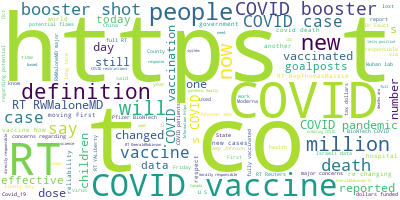

In [34]:
from wordcloud import WordCloud
import pandas as pd
cols = ['sentiments', 'tweets']
df = pd.read_csv('covid_data3.csv')
df.head()
df['tweets'] = df['tweets'].astype(str)
# Join the different processed titles together.
long_string = ','.join(list(df['tweets'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### PLOT OF MOST COMMON WORDS

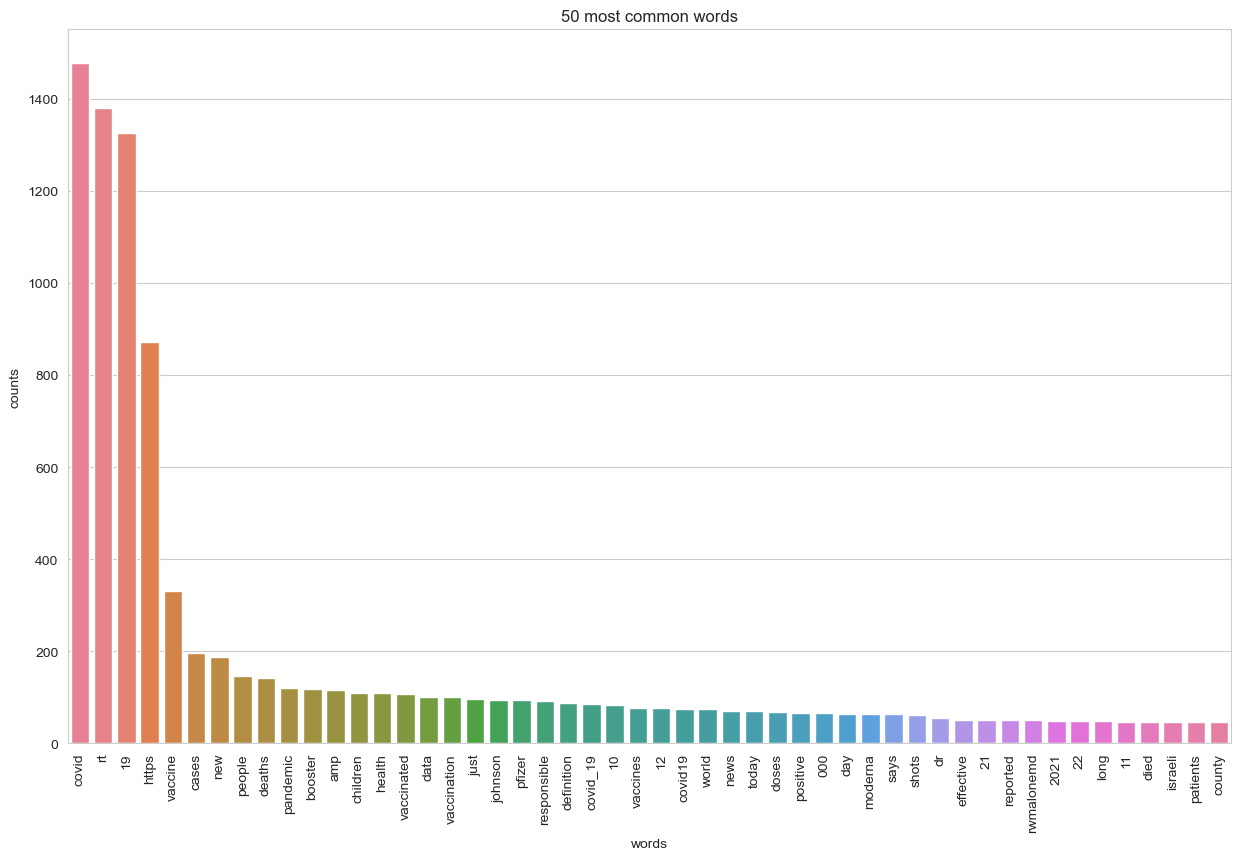

In [35]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_50_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out() #updated method
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='50 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['tweets'])
# Visualise the 10 most common words
plot_50_most_common_words(count_data, count_vectorizer)

### WORDCLOUD FOR POSITIVE AND NEGATIVE WORDS USED

Positive words


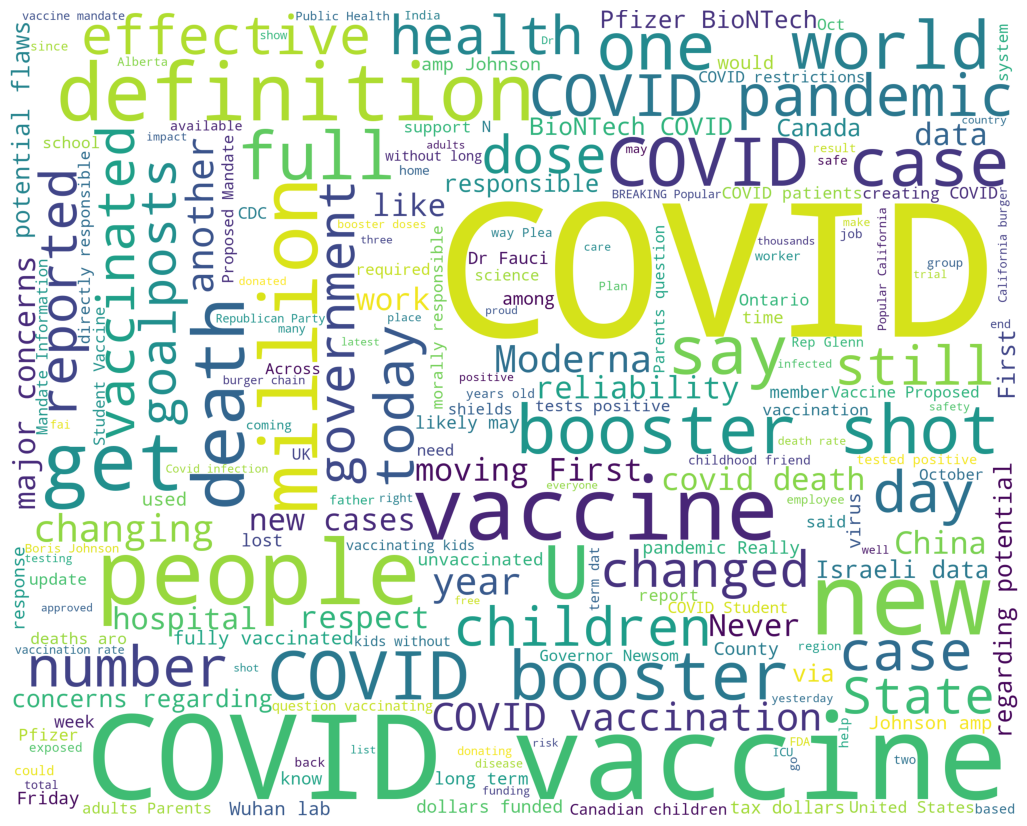

Negative words


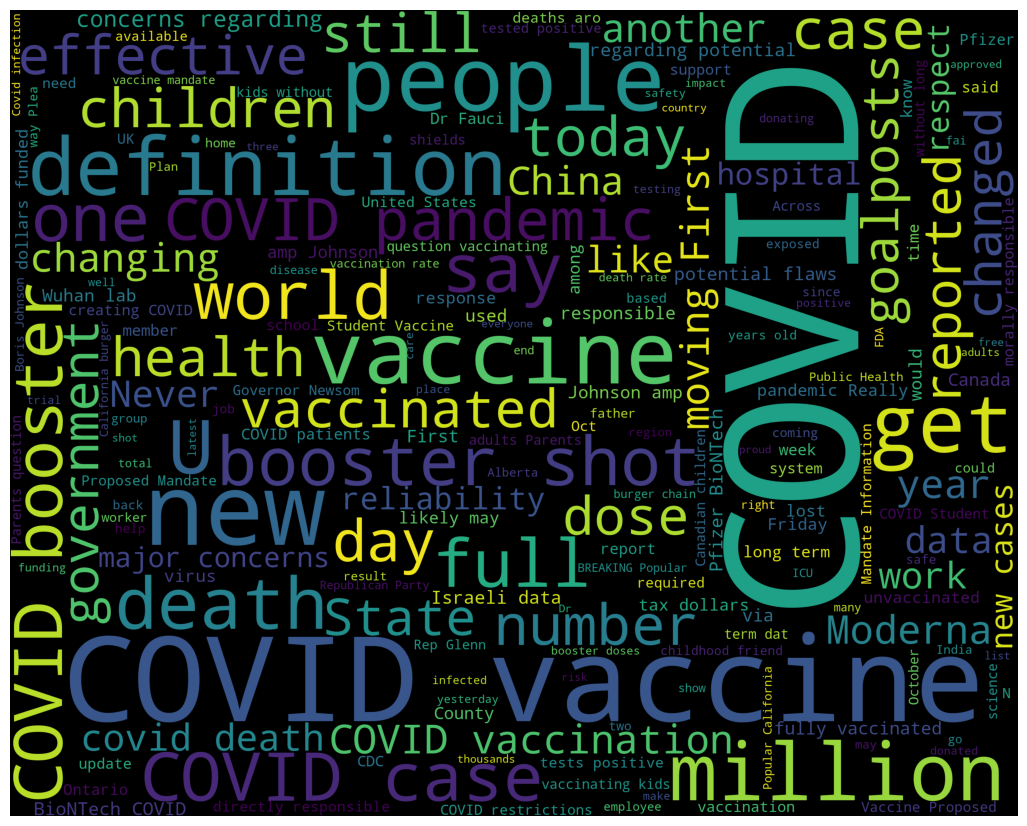

In [36]:
from nltk.corpus import stopwords
chachedWords = stopwords.words('english')
from nltk.corpus import stopwords

data = df[['sentiment','tweets']]

# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.2)
# Removing neutral sentiments
train = train[train.sentiment != "0"]

train_pos = train[ train['sentiment'] == '1']
train_pos = train['tweets']
train_neg = train[ train['sentiment'] == '-1']
train_neg = train['tweets']



def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords = chachedWords,background_color=color,width=2500,height=2000).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
     
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)        